# Health Inspections Across Prince George's County

We have a dataset containing a number of establishments in Prince George County. Details for each establishment like location, compliance based on inpections, who is the owner etc., are provided. Let us perform data analytics to gain insights:

In [1]:
# Load the libraries required for the our analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import regex as re
import plotly.graph_objects as go

Load the dataset into the notebook using pandas library:

In [2]:
# Load the dataset

df = pd.read_csv('HW6_food_inspections.csv')

# Display the dataframe

df.head()

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Hot_and_cold_running_water_provided,Proper_sewage_disposal,No_bare_hand_contact,Adequate_hand_washing_facilities,Rodent_and_insects,Food_contact_surfaces_and_equipment,Inspection_type,Owner,Type,Location
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,05/13/2020 12:00:00 AM,------,BOWIE,MD,20716.0,4100 TOWN CENTER BLVD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787)
1,16073,Anarkali Bazar,Grocery Store,03/24/2020 12:00:00 AM,Non-Compliant - Violations Observed,GREENBELT,MD,20770.0,6106 GREENBELT RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Pre-Opening Inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396)
2,1207,PUPUSERIA MORAZAN,Fast Food - Local,05/11/2020 12:00:00 AM,------,BRENTWOOD,MD,20722.0,4309 BLADENSBURG RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661)
3,3412,THE TENDER RIB & CATERING CO,Fast Food - Local,05/09/2020 12:00:00 AM,------,SUITLAND,MD,20746.0,4809 ALLENTOWN RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,CYNTHIA WALLACE,Food Establishments,POINT (-76.889999 38.818813)
4,16073,Anarkali Bazar,Grocery Store,03/31/2020 12:00:00 AM,Compliance Schedule - Completed,GREENBELT,MD,20770.0,6106 GREENBELT RD,------,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396)


In [3]:
# Variable declaration

hundred = 100

## Data Processing

First, let us do some data cleaning:

In [26]:
# Clean the columns

df['Zip']= df['Zip'].astype(str)
df['Zip']= df['Zip'].str.extract('(\d+)')
df['Inspection_results'] = df['Inspection_results'].replace('------','')
df['Address_line_2'] = df['Address_line_2'].replace('------','')

# Display the dataframe

df.head()

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Hot_and_cold_running_water_provided,Proper_sewage_disposal,No_bare_hand_contact,Adequate_hand_washing_facilities,Rodent_and_insects,Food_contact_surfaces_and_equipment,Inspection_type,Owner,Type,Location
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,05/13/2020 12:00:00 AM,,BOWIE,MD,20716,4100 TOWN CENTER BLVD,,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787)
1,16073,Anarkali Bazar,Grocery Store,03/24/2020 12:00:00 AM,Non-Compliant - Violations Observed,GREENBELT,MD,20770,6106 GREENBELT RD,,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Pre-Opening Inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396)
2,1207,PUPUSERIA MORAZAN,Fast Food - Local,05/11/2020 12:00:00 AM,,BRENTWOOD,MD,20722,4309 BLADENSBURG RD,,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661)
3,3412,THE TENDER RIB & CATERING CO,Fast Food - Local,05/09/2020 12:00:00 AM,,SUITLAND,MD,20746,4809 ALLENTOWN RD,,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,CYNTHIA WALLACE,Food Establishments,POINT (-76.889999 38.818813)
4,16073,Anarkali Bazar,Grocery Store,03/31/2020 12:00:00 AM,Compliance Schedule - Completed,GREENBELT,MD,20770,6106 GREENBELT RD,,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,YASIR RANA,Food Establishments,POINT (-76.908332 38.997396)


### Categories of Establishments:

Let us determine different types of establishments present in the dataset:

In [5]:
# Number of distinct establishments

ser_cat_est = df['Category'].unique()

# Display output in a series

print(ser_cat_est)

['Restaurant' 'Grocery Store' 'Fast Food - Local' 'Carry-out'
 'Convenience Store' 'Seafood' 'Fast Food - Chain' nan 'Institution'
 'Grocery Store- Medium' 'Meat/Poultry Market' 'Gas Station Store'
 'Membership Warehouse' 'Ice Cream' 'Casino' 'Public School' 'Coffee Shop'
 '@Full Service' 'Specialty Store' 'Hotel' 'Dollar Store' 'Fast Food'
 'Full Service' 'Private School' 'Stadium/Amusement Park' 'Bakery'
 'Multiple Facilities' 'College/University' 'Catering Only'
 'Snack Bar/Concession Stand' 'Limited Service' 'Pre-Packaged Only' 'Deli'
 'Bar/Tavern/Lounge' 'Health Care Facility' 'Buffet'
 'After School Supper Program' 'Private Club' 'Cafeteria' 'Night Club'
 'Grocery Store - Large' 'Church/Temple/Mosque' 'Fire/Community Hall'
 'Banquet Hall/Ballroom' 'Senior Nutrition Program' 'Diet/Nutrition Site'
 'Bakery/Catering' '@Fast Food-Do Not Use' 'Full Service/Catering' 'Pizza'
 'Delivery Only' 'Group Home' '@Fast Food' 'Farm Market' 'Micro Market'
 '@Full Service-Do Not Use' 'Diner' 'Exc

We will be considering below establihment categories as restaurants:

1. Restaurant: provide food services  who order and are served while seated.
2. Fast Food - Local/Fast Food/@Fast Food-Do Not Use/@Fast Food/:(all establishments with fast food):
    a specific type of restaurant that serves fast-food cuisine and has minimal table service.
3. Carry-out: a restaurant which sells food to be eaten elsewhere.
4. Seafood: a restaurant that specializes in seafood cuisine and seafood dishes, such as fish and shellfish.
5. Full Service/@Full Service/@Full Service-Do Not Use:
    a restaurant that refers to a public eating establishment having a full lunch/dinner/course meals
6. Limited Service: a restaurant in which service is kept to a minimum, and a customer's interactions with staff ends when the customer receives their food
7. Buffet: self-serve food where guests can fill their plates as many times as they like for a flat price
8. Pizza: a restaurant place where pizzas are made, sold and served to customers.
9. Diner: a small, inexpensive restaurant 



We are not considering any establishment related to Caterer, Delicatessen, Convenience stores, Grocery stores, Bakery, School Cafeteria and Gasoline station as a restaurant.


In [6]:
# Categories representing a restaurant

cat_restaurants = ['Restaurant','Fast Food - Local','Carry-out','Seafood','Fast Food - Chain','@Full Service','Fast Food',
                   'Full Service','Limited Service','Buffet','@Fast Food-Do Not Use','@Fast Food','Pizza',
                   '@Full Service-Do Not Use','Diner']

# Display ouput

print(cat_restaurants)

['Restaurant', 'Fast Food - Local', 'Carry-out', 'Seafood', 'Fast Food - Chain', '@Full Service', 'Fast Food', 'Full Service', 'Limited Service', 'Buffet', '@Fast Food-Do Not Use', '@Fast Food', 'Pizza', '@Full Service-Do Not Use', 'Diner']


Let us create a dummy variable for our restaurant selections:

In [7]:
# Convert the column into a dataframe 

df_cat_est = df['Category'].to_frame()
df_cat_est

# Drop the duplicates

df_cat_est.drop_duplicates(inplace=True)
df_cat_est.reset_index(drop=True, inplace=True)

# Create dummy variable

df_cat_est['Restaurant'] = df_cat_est['Category'].isin(cat_restaurants)
df_cat_est_dummies = pd.get_dummies(data=df_cat_est, columns=['Restaurant'])

# Display the output

df_cat_est_dummies.set_index('Category', inplace=True)
df_cat_est_dummies.drop(columns='Restaurant_False', inplace=True)
print(df_cat_est_dummies)


                   Restaurant_True
Category                          
Restaurant                       1
Grocery Store                    0
Fast Food - Local                1
Carry-out                        1
Convenience Store                0
...                            ...
Excluded                         0
Donut                            0
Farmer's Market                  0
B & B                            0
School                           0

[62 rows x 1 columns]


The column/variable 'Restaurant_True' in the above dataframe depicts if a category is considered a restaurant as not.
If the value is 1, it implies it is a restaurant.

### Restaurant dataset

In [8]:
# Create the dataframe 

df_restaurant = df[df['Category'].isin(cat_restaurants)].reset_index(drop=True)

# Display the output

df_restaurant

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Hot_and_cold_running_water_provided,Proper_sewage_disposal,No_bare_hand_contact,Adequate_hand_washing_facilities,Rodent_and_insects,Food_contact_surfaces_and_equipment,Inspection_type,Owner,Type,Location
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,05/13/2020 12:00:00 AM,,BOWIE,MD,20716,4100 TOWN CENTER BLVD,,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787)
1,1207,PUPUSERIA MORAZAN,Fast Food - Local,05/11/2020 12:00:00 AM,,BRENTWOOD,MD,20722,4309 BLADENSBURG RD,,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661)
2,3412,THE TENDER RIB & CATERING CO,Fast Food - Local,05/09/2020 12:00:00 AM,,SUITLAND,MD,20746,4809 ALLENTOWN RD,,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,CYNTHIA WALLACE,Food Establishments,POINT (-76.889999 38.818813)
3,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,05/13/2020 12:00:00 AM,,BOWIE,MD,20716,4100 TOWN CENTER BLVD,,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Food Complaint,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787)
4,1207,PUPUSERIA MORAZAN,Fast Food - Local,05/11/2020 12:00:00 AM,,BRENTWOOD,MD,20722,4309 BLADENSBURG RD,,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23307,814,KIM'S INDUSTRIAL GRILL,Fast Food - Local,10/20/2022 12:00:00 AM,Compliant - No Health Risk,CAPITOL HEIGHTS,MD,20743,8541 ASHWOOD DR,,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,NaN,Joy Bae,Food Establishments,POINT (-76.858002 38.882045)
23308,7541,AMERICA'S BEST WINGS,Fast Food - Chain,08/08/2022 12:00:00 AM,Compliance Schedule - Completed,BRENTWOOD,MD,20722,3651 BLADENSBURG RD,,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,SHAMAL D'COSTA,Food Establishments,POINT (-76.95204 38.93442)
23309,1880,ERNIE'S CRAB HOUSE,Carry-out,09/30/2022 12:00:00 AM,Non-Compliant - Violations Observed,BRENTWOOD,MD,20722,4305 BLADENSBURG RD,,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Out of Compliance,Monitoring,WILLIAM GAUZZA,Food Establishments,POINT (-76.94503 38.93753)
23310,945,MARLBORO GRILLE,Restaurant,10/17/2022 12:00:00 AM,Compliant - No Health Risk,UPPER MARLBORO,MD,20772,14606 MAIN ST,,...,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,In Compliance,Re-inspection,Jung Stone,Food Establishments,POINT (-76.752549 38.816079)


#### Percentage Compliance

Let us calculate restaurants that are compliant based on last inspection:

In [9]:
# Create a temporary dataframe to determine the percentage of compliant establishments

df_compliance = df_restaurant[['Establishment_id','Inspection_date', 'Inspection_results']].copy()

# Convert date to datetime column

df_compliance['Inspection_date'] = pd.to_datetime(df_compliance['Inspection_date'])

# Sort the values and remove duplicates to keep the last inspected date record for each establishment

df_compliance.sort_values(['Establishment_id','Inspection_date'], inplace=True)
df_compliance.drop_duplicates('Establishment_id', keep='last', inplace=True)
df_compliance.reset_index(drop=True)


# total number of records

total_establishments = len(df_compliance)

# Number of compliant restaurant - Assume only 'Compliant - No Health Risk','Compliant - Health Risk' values

compliant_count = df_compliance[df_compliance['Inspection_results'].str.match('Compliant')].reset_index(drop=True)

# Compliant records

total_compliant_establishments = len(compliant_count)

# Calculate the percentage

percentage = (total_compliant_establishments / total_establishments ) * hundred

print(f'percentage of establishments achieving compliance at its last inspection:{percentage:0.2f}%')


percentage of establishments achieving compliance at its last inspection:15.28%


#### Results

We have considered restaurants are compliant whose inspection results are either 'Compliant - No Health Risk' or 'Compliant - Health Risk'. These two are our criteria for compliance.
Having violations or completion of compliance schedule does not imply that the restaurant is compliant according to the food establishment rules.
Out of the establishments, approximately 15% have compliance with our criteria on the last inspection date. This is a low number and the establishments which are not compliant need to address on priority.

#### Datetime

In [10]:
# Convert the inspection date column into datetime

df_restaurant['Inspection_date'] = pd.to_datetime(df_restaurant['Inspection_date'])


# Create new columns with Year, month and year-month

df_restaurant['Year'] = df_restaurant['Inspection_date'].dt.year
df_restaurant['Month'] = df_restaurant['Inspection_date'].apply(lambda x: x.strftime('%b')) 
df_restaurant['Month_Year'] = df_restaurant['Inspection_date'].apply(lambda x: x.strftime('%B-%Y')) 


# Display the dataframe 

df_restaurant.head(10)

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Adequate_hand_washing_facilities,Rodent_and_insects,Food_contact_surfaces_and_equipment,Inspection_type,Owner,Type,Location,Year,Month,Month_Year
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,2020-05-13,,BOWIE,MD,20716,4100 TOWN CENTER BLVD,,...,In Compliance,In Compliance,In Compliance,NaN,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787),2020,May,May-2020
1,1207,PUPUSERIA MORAZAN,Fast Food - Local,2020-05-11,,BRENTWOOD,MD,20722,4309 BLADENSBURG RD,,...,In Compliance,In Compliance,In Compliance,Food Complaint,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661),2020,May,May-2020
2,3412,THE TENDER RIB & CATERING CO,Fast Food - Local,2020-05-09,,SUITLAND,MD,20746,4809 ALLENTOWN RD,,...,In Compliance,In Compliance,In Compliance,NaN,CYNTHIA WALLACE,Food Establishments,POINT (-76.889999 38.818813),2020,May,May-2020
3,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,2020-05-13,,BOWIE,MD,20716,4100 TOWN CENTER BLVD,,...,In Compliance,In Compliance,In Compliance,Food Complaint,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787),2020,May,May-2020
4,1207,PUPUSERIA MORAZAN,Fast Food - Local,2020-05-11,,BRENTWOOD,MD,20722,4309 BLADENSBURG RD,,...,In Compliance,In Compliance,In Compliance,NaN,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661),2020,May,May-2020
5,1085,PANDA CAFE,Carry-out,2020-01-27,Critical Violations observed,OXON HILL,MD,20745,5119 INDIAN HEAD HWY,B,...,In Compliance,In Compliance,In Compliance,Re-inspection,ZHAO SHU ZHENG,Food Establishments,POINT (-77.000162 38.819457),2020,Jan,January-2020
6,49,APPLEBEE'S,Restaurant,2020-05-20,Compliant - No Health Risk,SPRINGDALE,MD,20774,1000 LARGO CENTER DR,,...,In Compliance,In Compliance,In Compliance,Food Complaint,TERRI M CARMAN,Food Establishments,POINT (-76.837558 38.902716),2020,May,May-2020
7,233,CAMERON'S SEAFOOD RESTAURANT,Seafood,2020-05-28,,CAPITOL HEIGHTS,MD,20743,8807 CENTRAL AVE,A,...,In Compliance,In Compliance,In Compliance,NaN,BJJAN MANESH,Food Establishments,POINT (-76.852767 38.890613),2020,May,May-2020
8,1303,SAKURA JAPANESE STEAK & SEAFOOD HOUSE,Restaurant,2020-05-26,,LAUREL,MD,20707,13487 BALTIMORE AVE,108,...,In Compliance,In Compliance,In Compliance,Food Complaint,MARC HA,Food Establishments,POINT (-76.869151 39.075324),2020,May,May-2020
9,1146,PIZZA HUT 23538,Fast Food - Chain,2020-05-29,Non-Compliant - Violations Observed,COLLEGE PARK,MD,20740,9015 BALTIMORE AVE,,...,In Compliance,In Compliance,In Compliance,Change Of Ownership,LUIS IBARGUENGOYTIA,Food Establishments,POINT (-76.931327 38.999878),2020,May,May-2020


#### Dummy variables

Let us create dummy variables for each compliance type column and store it in a dataframe:

In [11]:
# Create a temporary dataframe 

df_restaurant_temp = df_restaurant.copy()

# Store only the compliance type columns in a list

compliance_list = df_restaurant_temp.columns.values.tolist()
compliance_list[10:25]

column = compliance_list[10:25]



for cols in column:

    df_restaurant_temp[cols] = df_restaurant_temp[cols].isin(['Out of Compliance'])

# Create dummies and format the dataframe

df_rest_dummies = pd.get_dummies(data=df_restaurant_temp, columns = column)    
df_rest_dummies = df_rest_dummies.filter(like='True',axis=1)
df_rest_dummies = df_rest_dummies.rename(columns=lambda x: re.sub('_True','',x))

# Create a temporary dataframe

df_display = df_rest_dummies.copy()

# Display the output with establishment 

df_display.insert(0, 'Establishment_id', df_restaurant['Establishment_id'])
df_display.insert(1, 'Name', df_restaurant['Name'])


# Display the output, with establishment id and names

df_display.head()

,Establishment_id,Name,Food_from_approved_source,Food_protected_from_contamination,Ill_workers_restricted,Proper_hand_washing,Cooling_time_and_temperature,Cold_holding_temperature,Hot_holding_temperature,Cooking_time_and_temperature,Reheating_time_and_temperature,Hot_and_cold_running_water_provided,Proper_sewage_disposal,No_bare_hand_contact,Adequate_hand_washing_facilities,Rodent_and_insects,Food_contact_surfaces_and_equipment
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1207,PUPUSERIA MORAZAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3412,THE TENDER RIB & CATERING CO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,900,LONGHORN STEAKHOUSE OF BOWIE 5174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1207,PUPUSERIA MORAZAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Total number of violations

Let us determine violations for each establishment type:

In [12]:
# Create a new column

df_restaurant['Number_of_Violations'] = df_rest_dummies.sum(axis = 1)

# Display the output

df_restaurant.head()

,Establishment_id,Name,Category,Inspection_date,Inspection_results,City,State,Zip,Address_line_1,Address_line_2,...,Rodent_and_insects,Food_contact_surfaces_and_equipment,Inspection_type,Owner,Type,Location,Year,Month,Month_Year,Number_of_Violations
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,2020-05-13,,BOWIE,MD,20716,4100 TOWN CENTER BLVD,,...,In Compliance,In Compliance,NaN,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787),2020,May,May-2020,0
1,1207,PUPUSERIA MORAZAN,Fast Food - Local,2020-05-11,,BRENTWOOD,MD,20722,4309 BLADENSBURG RD,,...,In Compliance,In Compliance,Food Complaint,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661),2020,May,May-2020,0
2,3412,THE TENDER RIB & CATERING CO,Fast Food - Local,2020-05-09,,SUITLAND,MD,20746,4809 ALLENTOWN RD,,...,In Compliance,In Compliance,NaN,CYNTHIA WALLACE,Food Establishments,POINT (-76.889999 38.818813),2020,May,May-2020,0
3,900,LONGHORN STEAKHOUSE OF BOWIE 5174,Restaurant,2020-05-13,,BOWIE,MD,20716,4100 TOWN CENTER BLVD,,...,In Compliance,In Compliance,Food Complaint,Colleen Lyons,Food Establishments,POINT (-76.733979 38.945787),2020,May,May-2020,0
4,1207,PUPUSERIA MORAZAN,Fast Food - Local,2020-05-11,,BRENTWOOD,MD,20722,4309 BLADENSBURG RD,,...,In Compliance,In Compliance,NaN,NAPOLEON CASTRO,Food Establishments,POINT (-76.944736 38.937661),2020,May,May-2020,0


Dummy variable to illustrate when an establishment has atleast one violation (meaning out of compliance) in any category:

In [13]:
# Check if violations present

violations = df_restaurant['Number_of_Violations'] > 0

# Create dummy variable 

df_violation_dummies = pd.get_dummies(data=violations,prefix='Out_Of_Compliance', prefix_sep='_', drop_first=True)
df_violation_dummies = df_violation_dummies.rename(columns=lambda x: re.sub('_True','',x))

# Format and display the variable with establishment id

df_violation_dummies.insert(0, 'Establishment_id', df_restaurant['Establishment_id'])
df_violation_dummies.insert(1, 'Name', df_restaurant['Name'])

df_violation_dummies.head(15)

,Establishment_id,Name,Out_Of_Compliance
0,900,LONGHORN STEAKHOUSE OF BOWIE 5174,0
1,1207,PUPUSERIA MORAZAN,0
2,3412,THE TENDER RIB & CATERING CO,0
3,900,LONGHORN STEAKHOUSE OF BOWIE 5174,0
4,1207,PUPUSERIA MORAZAN,0
5,1085,PANDA CAFE,1
6,49,APPLEBEE'S,0
7,233,CAMERON'S SEAFOOD RESTAURANT,0
8,1303,SAKURA JAPANESE STEAK & SEAFOOD HOUSE,0
9,1146,PIZZA HUT 23538,0


Note: 'Out_Of_Compliance' variable denotes the value 1 if any category for an establishment is violating the rules.

#### Pivot Table

In [14]:
# Create temporary dataframe

df_mul_insp = df_restaurant.copy()

# Update the dataframe having only multiple inspections

df_mul_insp.sort_values(['Establishment_id','Inspection_date'], inplace=True)
var = df_mul_insp['Establishment_id'].value_counts()
values = var[var>1].index
df_mul_insp = df_mul_insp[df_mul_insp['Establishment_id'].isin(values)]


# Select columns in the dataframe

df_mul_insp = df_mul_insp[['Establishment_id','Category','Inspection_date','Number_of_Violations']]


# Create temporary dataframe

df_mul_inspection = df_mul_insp.copy()

# Remove duplicates keeping the latest inspection date record for each restaurant

df_mul_inspection.drop_duplicates('Establishment_id', keep='last', inplace=True)


# Create a new column to indicate the Inspection count for that establishment

df_temp = pd.DataFrame(columns = list(df_mul_insp.columns) + ['Inspection'])

# For each restaurant with discrepancy, consider the category of the lastest inspection date

for eid in np.unique(df_mul_insp['Establishment_id'].values):

    cate = df_mul_inspection[df_mul_inspection['Establishment_id']== eid]['Category'].values[0]
    df_tmp = df_mul_insp[ (df_mul_insp['Establishment_id'] == eid) & (df_mul_insp['Category'] == cate)].copy()
    df_tmp.loc[:,'Inspection'] = ['Inspection ' + str(i) for i in range(1, (len(df_tmp)+1))]
    
    # Merge the dataframes
    
    df_temp = pd.concat([df_temp,df_tmp])

# Convert the date column to datetime and display the new column

df_temp['Inspection_date'] = pd.to_datetime(df_temp['Inspection_date'])    
df_temp.reset_index(inplace=True, drop=True)
df_temp['Inspection_date/Violations_Count'] = df_temp["Inspection_date"].astype(str) +'/' + df_temp["Number_of_Violations"].astype(str)

# Display the output 

df_temp.head(10)



,Establishment_id,Category,Inspection_date,Number_of_Violations,Inspection,Inspection_date/Violations_Count
0,2,Fast Food - Chain,2020-01-10,0,Inspection 1,2020-01-10/0
1,2,Fast Food - Chain,2020-02-07,0,Inspection 2,2020-02-07/0
2,2,Fast Food - Chain,2021-02-25,0,Inspection 3,2021-02-25/0
3,2,Fast Food - Chain,2021-07-15,0,Inspection 4,2021-07-15/0
4,3,Full Service,2013-03-08,0,Inspection 1,2013-03-08/0
5,3,Full Service,2014-07-18,0,Inspection 2,2014-07-18/0
6,3,Full Service,2014-07-18,2,Inspection 3,2014-07-18/2
7,3,Full Service,2014-09-18,0,Inspection 4,2014-09-18/0
8,3,Full Service,2016-01-12,0,Inspection 5,2016-01-12/0
9,3,Full Service,2017-01-10,0,Inspection 6,2017-01-10/0


#### Note: The new column created is having the inspection date and number of violations separated by a slash

In [15]:
# Create pivot table

df_temp2 = df_temp.pivot(index='Establishment_id', columns=['Inspection'], values='Inspection_date/Violations_Count')


/Users/pruthvishyambilla/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [16]:
# Sort the columns using the list 

list1 = ['Inspection ' + str(i) for i in range(1,len(df_temp2.columns)+1) ]
df_pivot = df_temp2[list1].copy()
df_pivot.fillna('', inplace=True)

# Display the ouput 

df_pivot

Inspection,Inspection 1,Inspection 2,Inspection 3,Inspection 4,Inspection 5,Inspection 6,Inspection 7,Inspection 8,Inspection 9,Inspection 10,...,Inspection 39,Inspection 40,Inspection 41,Inspection 42,Inspection 43,Inspection 44,Inspection 45,Inspection 46,Inspection 47,Inspection 48
Establishment_id,,,,,,,,,,,,,,,,,,,,,
2,2020-01-10/0,2020-02-07/0,2021-02-25/0,2021-07-15/0,,,,,,,...,,,,,,,,,,
3,2013-03-08/0,2014-07-18/0,2014-07-18/2,2014-09-18/0,2016-01-12/0,2017-01-10/0,2017-01-24/0,2017-07-28/2,2017-08-01/0,2017-12-15/0,...,,,,,,,,,,
4,2019-10-31/1,2020-03-11/1,2021-04-05/0,2021-08-02/1,2022-04-11/1,2022-04-20/0,2022-08-09/0,,,,...,,,,,,,,,,
8,2012-08-06/0,2012-12-12/0,2013-06-12/2,2014-09-29/3,2015-09-15/0,2016-04-04/3,2016-12-08/3,2017-05-05/1,2019-03-12/0,,...,,,,,,,,,,
10,2012-11-13/0,2016-06-10/0,2017-07-27/2,2017-08-03/0,2018-09-20/1,2019-09-23/1,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16125,2021-02-23/0,2021-12-14/2,2022-05-16/0,,,,,,,,...,,,,,,,,,,
16177,2021-06-09/1,2021-10-01/0,2022-06-28/0,,,,,,,,...,,,,,,,,,,
16273,2021-07-30/3,2021-08-13/1,,,,,,,,,...,,,,,,,,,,


In the above table, we will be showing for each establishment of restaurant, the date of inspection and number of violations found after each inspection.

Findings:

1. Consider for establishment id 2 and first inspection: value 2020-01-10/0 means that the inspection was conducted on 10th January 2020 and the number of violations found during the inspections are 0.

2. For establishment id 3 and third inspection: value 2014-07-18/2 means that the inspection was conducted on 18th July 2014 and the number of violations found during the inspections are 2.

## Data Analysis

#### Common violation category

In [17]:
# Create an empty dataframe

df_violation = pd.DataFrame([])

# Add a new column having total number of violations for each compliance category

df_violation['Number_Of_Violations'] = df_rest_dummies.sum()

# Dataframe formatting in descending order of violations count

df_violation = df_violation.reset_index()
df_violation.rename(columns={"index": "Violation_Type"}, inplace=True)
df_violation.sort_values(by = 'Number_Of_Violations', ascending= False, inplace=True)
df_violation = df_violation.reset_index(drop=True)

# Display the dataframe

df_violation

,Violation_Type,Number_Of_Violations
0,Cold_holding_temperature,5263
1,Food_contact_surfaces_and_equipment,4838
2,Rodent_and_insects,4144
3,Hot_holding_temperature,2245
4,Food_protected_from_contamination,1111
5,Proper_hand_washing,1012
6,Cooling_time_and_temperature,300
7,Hot_and_cold_running_water_provided,169
8,Cooking_time_and_temperature,113
9,Reheating_time_and_temperature,98


#### Observations

1. It is evident from the above table that the cold holding temperature of food have the highest number of violations across all the restaurants.
2.  The least out of compliance among the restaurants is the category of no contact of foods with the bare hand.

#### Conclusion

Common violation category among the restaurants is 'Cold_holding_temperature'

### Reinspections

Let us create a table to determine how many reinspections does it take for restaurants to become compliant:

In [18]:
# Create a temporary dataframe

df_temp = df_restaurant.astype(str).copy()

# Create a new column to check if an establishment has both below factors:
# 1. Compliant in Inspection results- yes then 1
# 2. Re-inspection in Inspection Type- yes then 1
# New column value will be 1 * 1 = 1 when both compliant and re-inspection done

df_temp['ins'] = df_temp['Inspection_results'].apply(lambda x: 0 if 'compliant' not in x.lower() else 1)
df_temp['ins'] = df_temp['ins'] * df_temp['Inspection_type'].apply(lambda x: 0 if 're-inspection' not in x.lower() else 1)

# Create a new column to check if and establishment has Inspection type value as 'Re-inspection'

df_temp['re_ins'] = df_temp['Inspection_type'].apply(lambda x: 0 if 're-inspection' not in x.lower() else 1)

# Create temporary dummy columns

df_temp['ins_modified'] = 0
df_temp['re_ins_modified'] = 0

# Create a new dataframe having row and column names with values 0

re_inspection_max = df_temp['Establishment_id'][df_temp['Inspection_type']=='Re-inspection'].value_counts().max()
est_max = df_temp['Establishment_id'].value_counts().max()

df_tmp_inspect = pd.DataFrame(0, 
columns = ['Never Compliant']+[f'Compliant after {i} Reinspections' for i in range(1, re_inspection_max+1)]+['Total'], 
index = [f'{j} Inspections' for j in range(1, est_max+1)]+['Total'])

# Populate values for each combination of inspections and compliance after reinspections

for eid in df_temp['Establishment_id'].unique():
    df_tmp = df_temp[df_temp['Establishment_id'] == eid]
    
    df_tmp.reset_index(drop=True, inplace = True)
    num_inspections = len(df_tmp)
    comply = df_tmp[df_tmp['ins'] == 1].index
    
    # Compliant?
    if len(comply) > 0:
        comply_ind = comply[0]
        num_comply_re_inspection = (df_tmp.loc[:comply_ind, 're_ins'].sum())
    else:
        num_comply_re_inspection = 0
        
        
    if num_comply_re_inspection == 0:
        df_tmp_inspect.loc[f'{str(num_inspections)} Inspections', 'Never Compliant'] += 1
    else:
        df_tmp_inspect.loc[f'{str(num_inspections)} Inspections', f'Compliant after {num_comply_re_inspection} Reinspections'] += 1

        
# Sum the values to get total along both axis     

df_tmp_inspect['Total'] = df_tmp_inspect.sum(axis=1)
df_tmp_inspect.loc['Total'] = df_tmp_inspect.sum(axis=0)

# Format the dataframe

df_tmp_inspect = df_tmp_inspect.replace(0, '')
df_tmp_inspect.loc['Total', 'Total'] = ''
df_tmp_inspect.drop(index = '1 Inspections',inplace=True)

# Display the output

df_tmp_inspect


,Never Compliant,Compliant after 1 Reinspections,Compliant after 2 Reinspections,Compliant after 3 Reinspections,Compliant after 4 Reinspections,Compliant after 5 Reinspections,Compliant after 6 Reinspections,Compliant after 7 Reinspections,Compliant after 8 Reinspections,Compliant after 9 Reinspections,...,Compliant after 13 Reinspections,Compliant after 14 Reinspections,Compliant after 15 Reinspections,Compliant after 16 Reinspections,Compliant after 17 Reinspections,Compliant after 18 Reinspections,Compliant after 19 Reinspections,Compliant after 20 Reinspections,Compliant after 21 Reinspections,Total
2 Inspections,40,4,,,,,,,,,...,,,,,,,,,,44
3 Inspections,51,4,,,,,,,,,...,,,,,,,,,,55
4 Inspections,43,1,2,,,,,,,,...,,,,,,,,,,46
5 Inspections,41,9,,1,,,,,,,...,,,,,,,,,,51
6 Inspections,29,2,,,,,,,,,...,,,,,,,,,,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64 Inspections,,,,,,,,,,,...,,,,,,,,,,
65 Inspections,,,,,,,,,,,...,,,,,,,,,,
66 Inspections,,,,,,,,,,,...,,,,,,,,,,
67 Inspections,,,,,,,,,1,,...,,,,,,,,,,1


### Observations

Note: Based on the number of inspections, we are determining for each establishment what is the count of inspections for first compliance (either 'Compliant - No Health Risk' or 'Compliant - Health Risk')

- Rows:- number of inspections done on a restaurant
- Columns:- number of reinspections for a restaurant to be compliant

1. Restaurants which are having atleast one violation in any of the compliance type, resulting in the status of never compliant has a value of 1012. This column has the highest value compared to others.
2. Fourty four restaurants had two inspections, among which almost 90%(40) establishments were never compliant.
3. We can see a trend that Compliancy count decreases after each Resinspection.

## Data Visualization

#### Bar Graph

Let us create a bar plot to display number of violations for each compliance type:

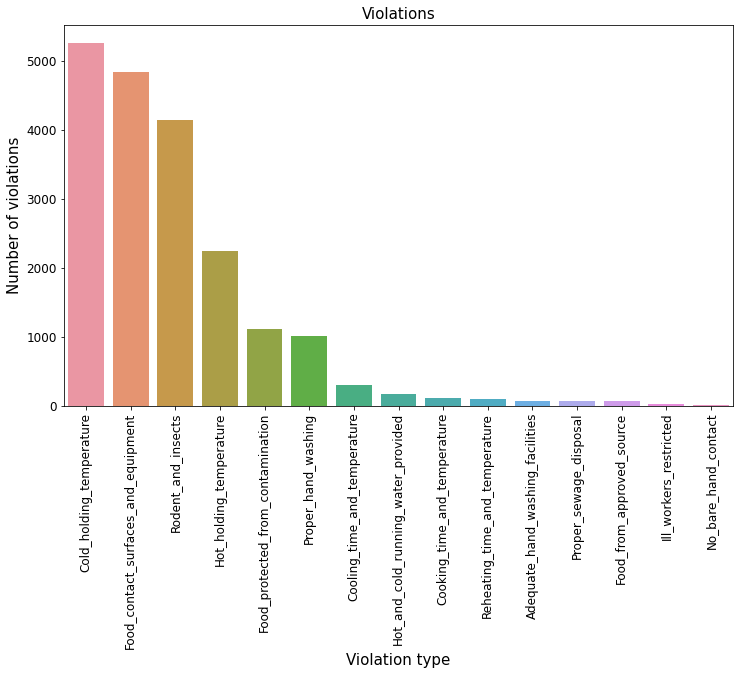

In [19]:
# Create temporary variables

ser1 = df_violation['Violation_Type']
ser2 = df_violation['Number_Of_Violations']

# Bar chart 

plt.rcParams["figure.figsize"] = (12,7)
sns.barplot(x=ser1, y=ser2)


# Chart Title

plt.title('Violations', fontsize=15)

# Horizontal axis attributes

plt.xlabel('Violation type', fontsize=15)
plt.xticks(rotation=90,fontsize=12)

# Vertical axis attributes

plt.ylabel('Number of violations', fontsize=15)
plt.yticks(fontsize=12)

# Display plot

plt.show()

#### Results

The above bar chart depicts the number of violations for each compliance category given in the dataset. 
- Cold holding temperature - Foods kept in cold holding must stay at or below 41°F at all times. Foods that fall below this temperature called “Danger Zone” must be thrown away. More than 5000 restaurants have violated this necessity.
- The next major violation is Food contact: A food contact surface is any surface, tool or piece of equipment that comes into contact with food, either directly or indirectly. There are almost 4800 establishment of restaurants not following this compliace type.

#### Line Graph

Let us now try to analyze violations by every month and year:

Average percentage value of inspections having atleast one violation is 44.95%
Year-Month with least violations: 202004 with 12.5%
Year-Month with most violations: 201809 with 60.66%


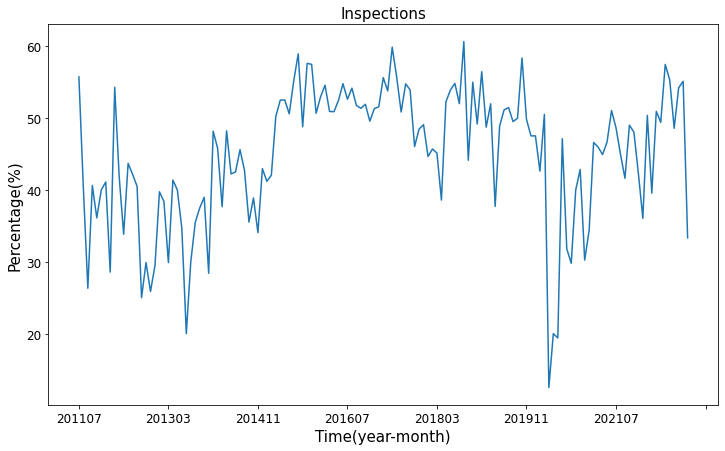

In [20]:
# Create a temporary dataframe 

df_restaurants = df_restaurant.copy() 

# Format the date column, example format 201107 for July 2011

df_restaurants['Year_Month'] = df_restaurants['Inspection_date'].apply(lambda x: x.strftime('%Y%m')) 

# Determine number of inspections in each year-month combination

num_inspections = df_restaurants['Year_Month'].value_counts()


# Determine number of restaurants with atleast one violation every month & year

num_violations = df_restaurants['Year_Month'][df_restaurants['Number_of_Violations'].astype(int)>0].value_counts()

# Calculate percentage

percentage = (num_violations / num_inspections) * hundred

# Remove record with future year

percentage.drop(index='202605', inplace=True)

# Sort the values

percentage.sort_index(inplace=True)

# Plot Line Graph

percentage.plot.line()

# Chart Title

plt.title('Inspections', fontsize=15)

# Horizontal axis attributes

plt.xlabel('Time(year-month)', fontsize=15)
plt.xticks(fontsize=12)

# Vertical axis attributes

plt.ylabel('Percentage(%)', fontsize=15)
plt.yticks(fontsize=12)

# Display the average value

print(f'Average percentage value of inspections having atleast one violation is {percentage.mean():0.2f}%')


more_restaurant_passed = percentage.index[percentage == percentage.min()]

print(f'Year-Month with least violations: {more_restaurant_passed[0]} with {percentage.min()}%')


less_restaurant_passed = percentage.index[percentage == percentage.max()]

print(f'Year-Month with most violations: {less_restaurant_passed[0]} with {percentage.max():0.2f}%')

Observations:

1. It is getting harder over time for conducting inspections. When compared to mean value of 44.95%, there are more violations on monthly basis. Especially during the period between the years 2015-2018, the trend is above the average value.

2. In April 2020, the percentage of violations is the least with 12.5%. In this particular month, more restaurants pass the compliance violations compared to other months in any year in terms of percentages.

3. Probably the inspections performed in April 2020 are very less. For only 8 restaurants, just one establishment violated the health inspection rules. This resulted in less percentage of violations.

4. In September 2018, the percentage of violations is the most with 60.66%. In this particular month, more restaurants inspected have compliance violations compared to other months in any year in terms of percentages.
